<a href="https://colab.research.google.com/github/Harshith-VC/Loan-Application-Analysis/blob/main/Analyzing_Loan_Application_Data_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Loan Case Study**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

1. Reading the Data File







In [ ]:
app_df=pd.read_csv('application_data.csv')

In [ ]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_df.shape

(42726, 122)

2. Data Quality and Missing Values

In [ ]:
app_df.isnull().sum().sort_values(ascending=False)

,0
COMMONAREA_MEDI,29941
COMMONAREA_AVG,29941
COMMONAREA_MODE,29941
NONLIVINGAPARTMENTS_MODE,29705
NONLIVINGAPARTMENTS_AVG,29705
...,...
REGION_POPULATION_RELATIVE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
TARGET,0


Calculate the missing values percentage for each column

In [ ]:
missing_value = round(app_df.isnull().sum() / len(app_df) * 100, 2).sort_values(ascending=False)
missing_value.head()

,0
COMMONAREA_MEDI,70.08
COMMONAREA_AVG,70.08
COMMONAREA_MODE,70.08
NONLIVINGAPARTMENTS_MODE,69.52
NONLIVINGAPARTMENTS_AVG,69.52


Convert to DataFrame and assign a column name

In [ ]:
# Calculate the missing values percentage for each column
missing_value = round(app_df.isnull().sum() / len(app_df) * 100, 2).sort_values(ascending=False)

# Reset index to convert the series to a DataFrame
missing_value = missing_value.reset_index()

# Rename the columns to 'Column_Name' and 'Missing_Percentage'
missing_value.columns = ['Column_Name', 'Missing_Percentage']
missing_value.head(5)

,Column_Name,Missing_Percentage
0,COMMONAREA_MEDI,70.08
1,COMMONAREA_AVG,70.08
2,COMMONAREA_MODE,70.08
3,NONLIVINGAPARTMENTS_MODE,69.52
4,NONLIVINGAPARTMENTS_AVG,69.52


**Observation:**


The missing value percentage is less than 32%, so it is reasonable to apply imputation methods to fill in the missing values rather than removing the columns or rows.

In [ ]:
# Loop through each column in the DataFrame and fill missing values with the mode
for column in app_df.columns:
    app_df[column] = app_df[column].fillna(app_df[column].mode()[0])

# Check if there are any missing values left in any columns
missing_values_after_filling = app_df.isnull().sum()

# Display the remaining missing values (if any)
missing_values_after_filling

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0


Now we can see that there are zero missing values in the data

In [ ]:
app_df.isnull().sum().sort_values(ascending=False)

,0
SK_ID_CURR,0
OBS_30_CNT_SOCIAL_CIRCLE,0
WALLSMATERIAL_MODE,0
TOTALAREA_MODE,0
HOUSETYPE_MODE,0
...,...
LIVE_REGION_NOT_WORK_REGION,0
REG_REGION_NOT_WORK_REGION,0
REG_REGION_NOT_LIVE_REGION,0
HOUR_APPR_PROCESS_START,0


# Countplot For All Columns

In [ ]:
# Get all categorical columns
categorical_columns = app_df.select_dtypes(include=['object', 'category']).columns

# Number of columns and rows for the grid
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(categorical_columns) / n_cols)  # Automatically calculate rows needed

# Create subplots grid
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=categorical_columns)

# Loop through each categorical column and add a bar chart for the count plot
for i, column in enumerate(categorical_columns):
    row = math.floor(i / n_cols) + 1
    col = (i % n_cols) + 1

    # Create count plot for each categorical column
    value_counts = app_df[column].value_counts()

    # Add bar chart to the grid
    fig.add_trace(
        go.Bar(x=value_counts.index, y=value_counts.values, name=column),
        row=row, col=col
    )

# Update layout for better visualization
fig.update_layout(
    height=400 * n_rows, width=1000,  # Adjust size based on number of rows
    showlegend=False,  # Hide legends to save space
    title_text="Count Plots of Categorical Variables",
    title_x=0.5
)

# Rotate x-axis labels for all subplots
fig.update_xaxes(tickangle=45)

# Show the plot grid
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Select only numeric columns from the DataFrame
numeric_columns = app_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numeric_columns.corr()

# Set a threshold for high correlation (for example, absolute value > 0.8)
threshold = 0.8

# Create a mask to highlight correlations above the threshold
highlight_mask = np.abs(correlation_matrix.values) > threshold

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    text=correlation_matrix.round(2).values,  # Show correlation values rounded to 2 decimal places
    texttemplate="%{text}",  # Format text in the heatmap
    colorscale='Viridis',  # Color scale for correlation values
    showscale=True,
    zmin=-1, zmax=1,  # Set limits for the correlation values (-1 to 1)
    colorbar=dict(title="Correlation")
))

# Add a contour-like outline around highly correlated pairs for highlighting
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if highlight_mask[i, j]:
            fig.add_trace(go.Scatter(
                x=[correlation_matrix.columns[j]],
                y=[correlation_matrix.columns[i]],
                mode="markers",
                marker=dict(
                    color="red",
                    size=12,
                    symbol="circle-open",
                    line=dict(color="black", width=2)
                ),
                showlegend=False
            ))

# Update layout for better visualization
fig.update_layout(
    title="Correlation Heatmap of Numerical Columns (Highlighted)",
    xaxis_title="Columns",
    yaxis_title="Columns",
    width=1000,
    height=1000
)

# Show the plot
fig.show()


              Top 5 observations

1. **Loan Amount and Goods Price**:
   There is a strong positive relationship between the amount of the loan and the price of the goods. This means the higher the price of the goods, the bigger the loan amount, making these two features very closely connected.

2. **Living Area and Apartment Size**:
   Features related to the size of the apartment and the living area are highly correlated. This suggests that larger apartments tend to have larger living areas, so these features often move together.

3. **Building Year and Usage Year**:
   There’s a strong relationship between the year a building was built and the year it was first used. Older buildings generally show a consistent pattern in both, indicating these features are very similar in the dataset.

4. **Credit Scores and Income**:
   External credit scores show some correlation with income. This means higher credit scores are often linked to higher incomes, making these credit scores important for understanding a customer’s financial standing.

5. **Document Flags**:
   Flags indicating whether certain documents were provided show very weak relationships with other factors. This suggests these flags don’t have much impact on other variables like loan amount or income.


# Derive Insights

1. Income Distribution and Loan Amount

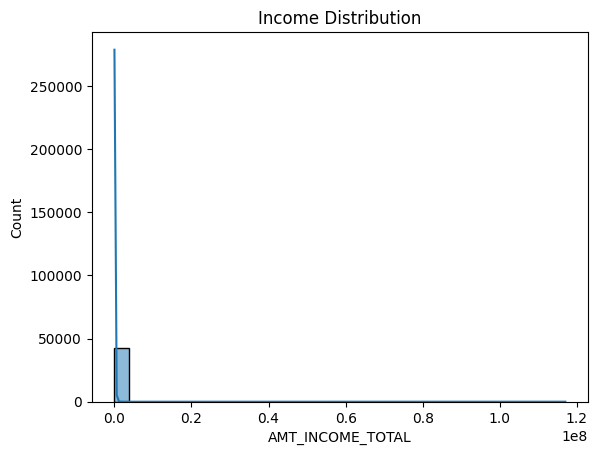

In [ ]:
# Distribution of annual income
sns.histplot(app_df['AMT_INCOME_TOTAL'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

Observations:

1. **Most People Have Low Incomes**:  
   The graph shows that most people earn smaller amounts of money. Very few people have high incomes.

2. **A Few People Earn a Lot**:  
   There are some people who make a lot of money, but they are very rare compared to everyone else.

3. **Most of the Data is Close to Zero**:  
   A large number of people have incomes that are near the low end, close to zero.

4. **Hard to See the Data Clearly**:  
   Because a few people have very high incomes, it stretches the graph and makes it hard to see the details for the rest of the people.

5. **We Might Need to Adjust the Data**:  
   To understand the data better, we might need to change how we look at it, like using a log scale or focusing on the lower incomes.

This means most people earn small amounts, and only a few earn a lot, which makes the graph look uneven.


2. Loan Amount distribution

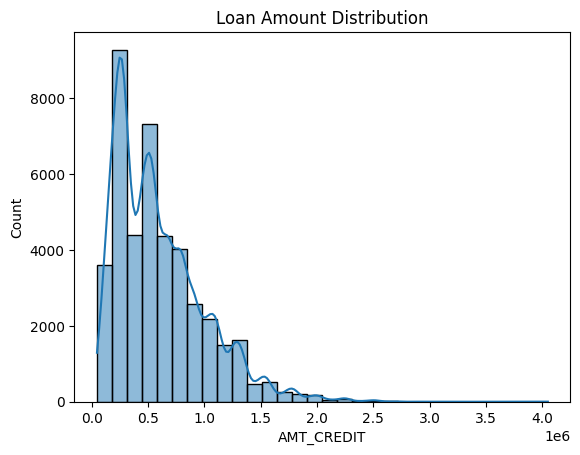

In [ ]:
sns.histplot(app_df['AMT_CREDIT'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.show()

Observations:

1. **Most Loans Are Small**:  
   Most people have taken smaller loans, with a large number of loans around the lower end of the scale (close to 0.5 million).

2. **Few Large Loans**:  
   There are fewer people taking larger loans. As the loan amount increases, the number of loans decreases.

3. **Peaks at Lower Loan Values**:  
   There is a peak in loan amounts around 0.25 to 0.5 million, which means many people are borrowing within this range.

4. **Skewed Distribution**:  
   The graph shows that loan amounts are unevenly distributed, with most people borrowing smaller amounts and only a few borrowing much larger amounts.

This means most people take smaller loans, and fewer people take larger loans.

3. Loan Type vs Loan Approval

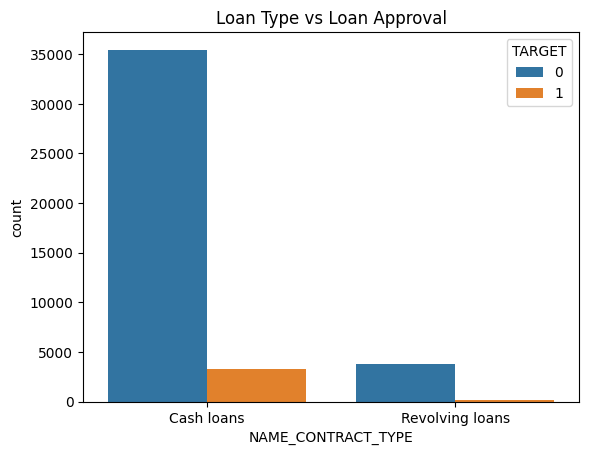

In [ ]:
# Loan type vs Target (1 = default, 0 = no default)
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=app_df)
plt.title('Loan Type vs Loan Approval')
plt.show()

Observations:

1. **Cash Loans Are More Common**:  
   Most loans are cash loans, with a much higher count compared to revolving loans.

2. **Higher Approval for Cash Loans**:  
   The majority of cash loans are approved, as shown by the large blue bar representing successful approvals (TARGET = 0).

3. **Few Defaults on Cash Loans**:  
   Although there are some defaults on cash loans (orange bar, TARGET = 1), the number is much smaller compared to the approved ones.

4. **Revolving Loans Are Less Common**:  
   There are far fewer revolving loans compared to cash loans, with both approval and default numbers being much lower.

In summary, cash loans are much more popular, and most are approved, while revolving loans are less common and show very few defaults.

4. Gender vs Loan Approval

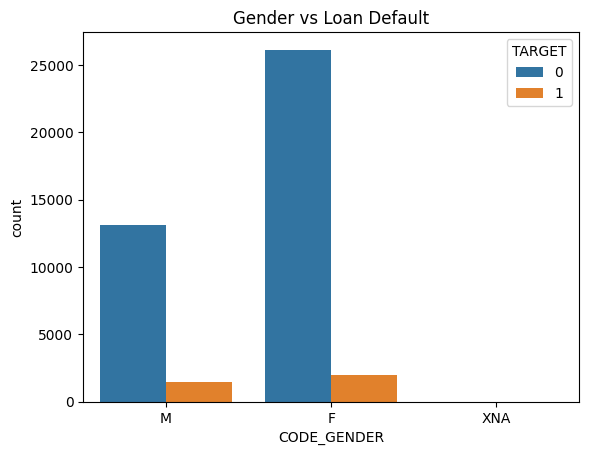

In [ ]:
# Gender vs Loan Default
sns.countplot(x='CODE_GENDER', hue='TARGET', data=app_df)
plt.title('Gender vs Loan Default')
plt.show()

Observations:

1. **More Female Loan Approvals**:  
   Females (F) have the highest number of approved loans, as shown by the large blue bar for TARGET = 0.

2. **Fewer Male Loan Approvals**:  
   Males (M) have fewer approved loans compared to females, with a smaller blue bar.

3. **Small Number of Defaults for Both Genders**:  
   Both males and females have a small number of loan defaults (orange bars for TARGET = 1), but the default rate seems slightly higher for males.

In summary, females have more approved loans than males, and the number of defaults is small for both genders.

5. Ownership and Loan Approval

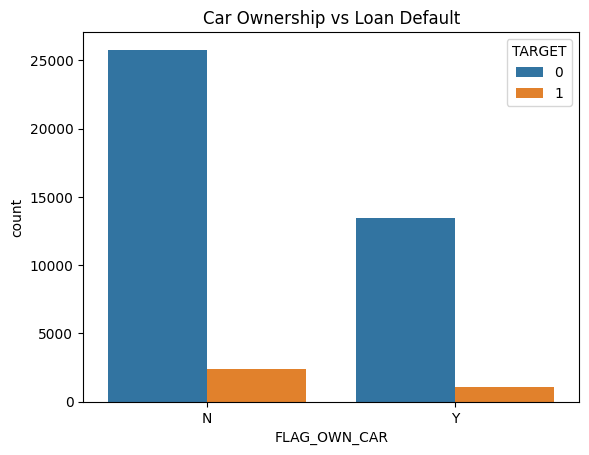

In [ ]:
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=app_df)
plt.title('Car Ownership vs Loan Default')
plt.show()

Observations:

1. **More People Without Cars Get Loans**:  
   People who don’t own a car (N) are more likely to have loans approved, as shown by the large blue bar for TARGET = 0.

2. **Fewer Defaults for Non-Car Owners**:  
   While non-car owners have some defaults (small orange bar for TARGET = 1), the number of defaults is still smaller compared to approved loans.

3. **Car Owners Have Fewer Loans**:  
   People who own cars (Y) have fewer loans approved compared to non-car owners, as indicated by the smaller blue bar.

In summary, people without cars get more loans, and the number of defaults is low for both car owners and non-car owners.

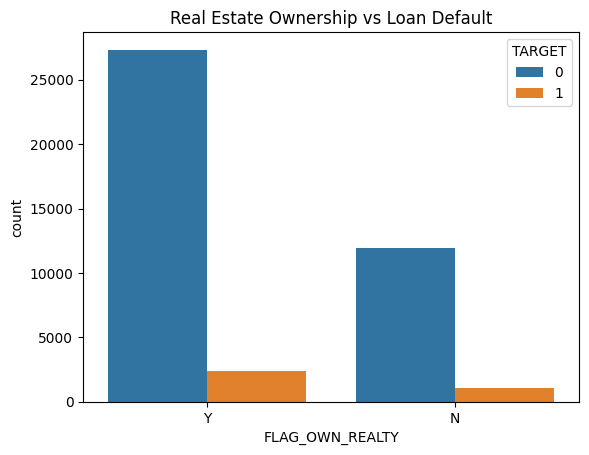

In [ ]:
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=app_df)
plt.title('Real Estate Ownership vs Loan Default')
plt.show()

Observations:

1. **More Loans for Real Estate Owners**:  
   People who own real estate (Y) have a higher number of approved loans, as shown by the large blue bar for TARGET = 0.

2. **Fewer Loans for Non-Owners**:  
   People who do not own real estate (N) have fewer approved loans, as indicated by the smaller blue bar.

3. **Low Defaults for Real Estate Owners**:  
   Real estate owners show some defaults (small orange bar for TARGET = 1), but the number is much lower compared to the approved loans.

In summary, real estate owners are more likely to get loans approved, and defaults are low for both real estate owners and non-owners.

7. Correlation Analysis

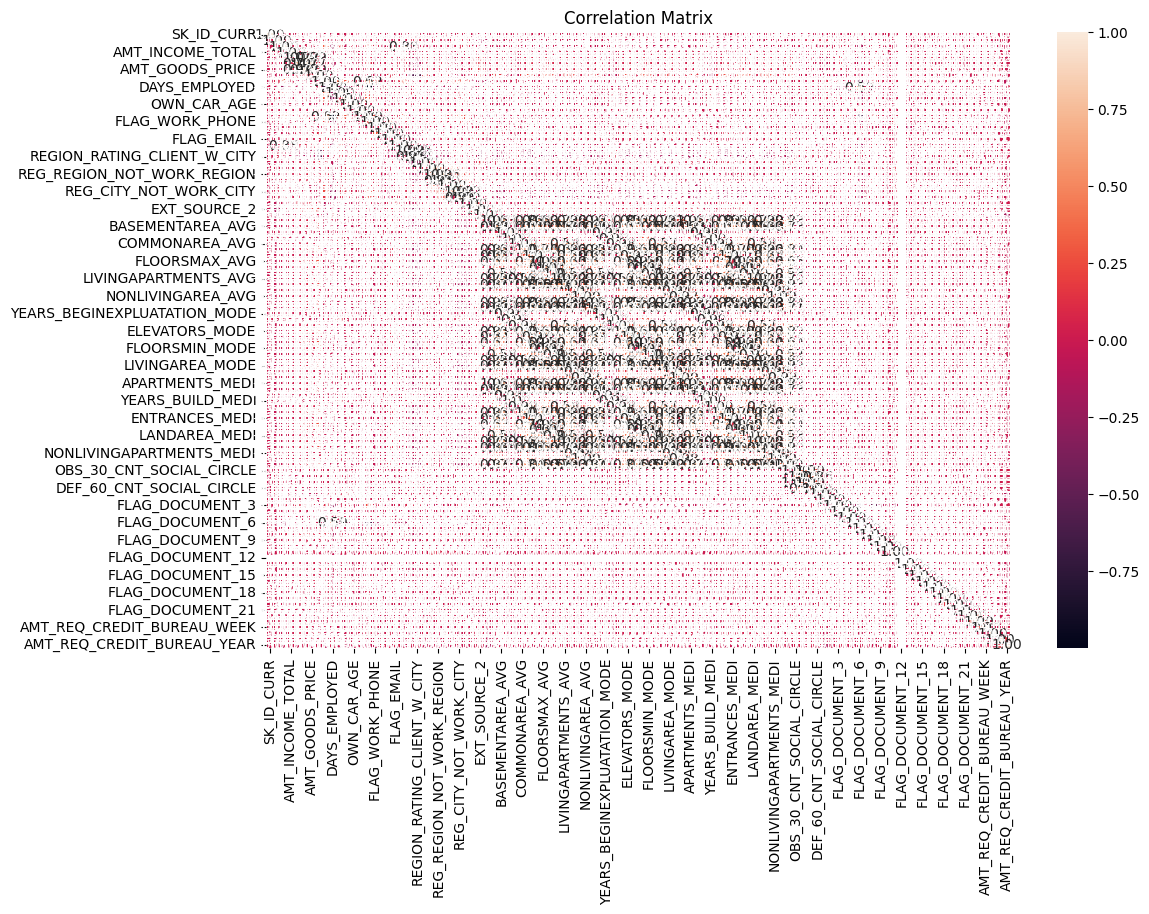

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_df = app_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=.5,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

8. Debt-to-Income Ratio and Loan Approval

<ipython-input-73-fa5a2483c89b>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



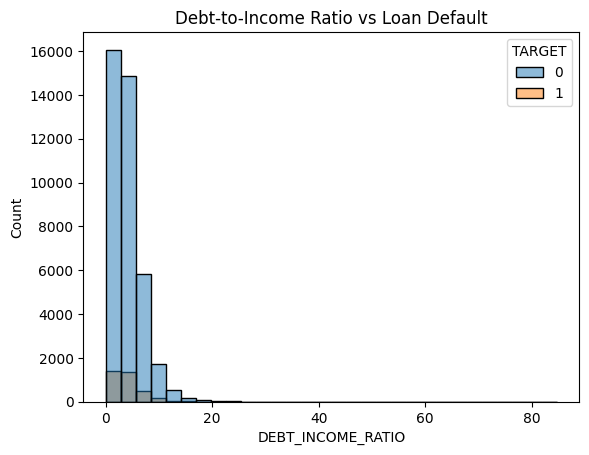

In [ ]:
# Creating Debt to Income ratio
app_df['DEBT_INCOME_RATIO'] = app_df['AMT_CREDIT'] / app_df['AMT_INCOME_TOTAL']

# Debt-to-income ratio vs Loan Default
sns.histplot(x='DEBT_INCOME_RATIO', hue='TARGET', data=app_df, bins=30)
plt.title('Debt-to-Income Ratio vs Loan Default')
plt.show()

Observations

1. **Low Debt-to-Income Ratios Are Common**:  
   Most people have a low debt-to-income ratio, with the majority of the data concentrated below a ratio of 10.

2. **More Approved Loans at Low Ratios**:  
   Loans are mostly approved (blue bars) for people with lower debt-to-income ratios. As the ratio increases, the number of approved loans decreases.

3. **Defaults Happen at Low Ratios**:  
   Some loan defaults (orange bars) still occur even at low debt-to-income ratios, though the number of defaults is much smaller compared to approved loans.

In summary, most loans are approved for people with lower debt-to-income ratios, while defaults are much less common, especially as the ratio increases.

9. Employment Type vs Loan Default

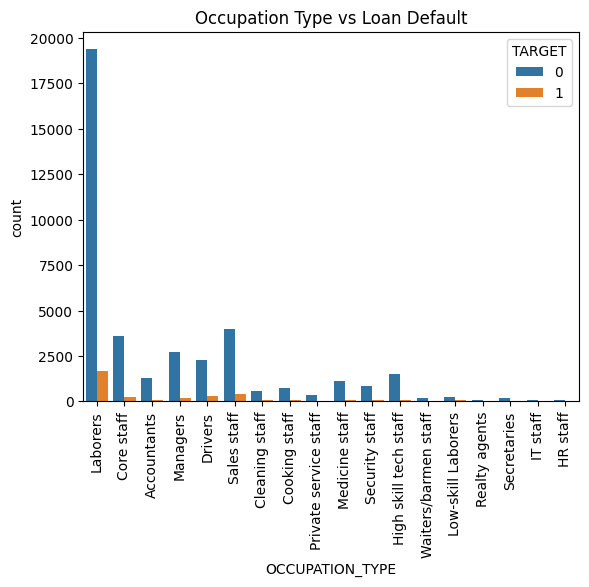

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=app_df)
plt.xticks(rotation=90)
plt.title('Occupation Type vs Loan Default')
plt.show()

Observations:

1. **Laborers Have the Most Loans**:  
   Laborers have the highest number of approved loans (blue bar for TARGET = 0) compared to any other occupation.

2. **Core Staff and Sales Staff Also Have Many Loans**:  
   Core staff and sales staff follow laborers in having a considerable number of approved loans, though their numbers are much smaller compared to laborers.

In summary, laborers have the highest number of loans, while defaults are low across all occupations. Some occupations have significantly fewer loans overall.

# Visualizations for Loan Approval Trends

Debt toIncome Ratio vs Loan Approval Rate

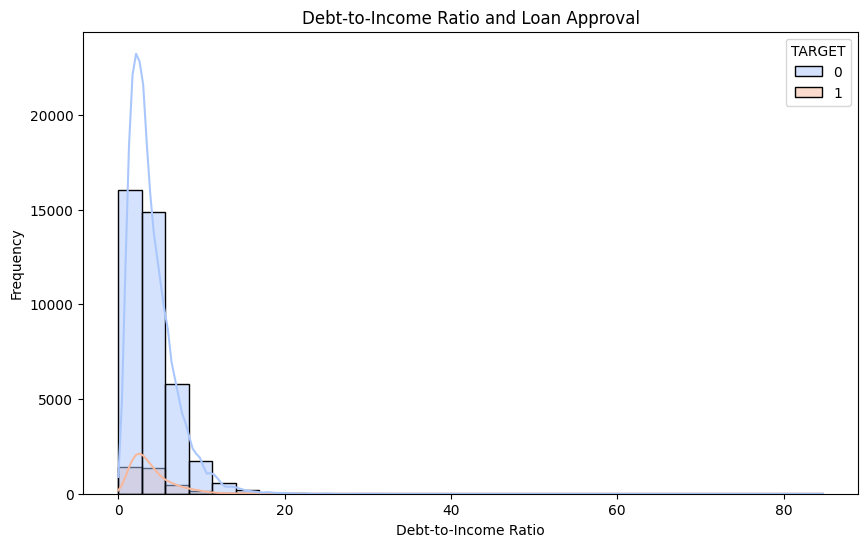

In [ ]:
# Create Debt to Income Ratio
app_df['DEBT_INCOME_RATIO'] = app_df['AMT_CREDIT'] / app_df['AMT_INCOME_TOTAL']


plt.figure(figsize=(10, 6))
sns.histplot(x='DEBT_INCOME_RATIO', hue='TARGET', data=app_df, bins=30, kde=True, palette='coolwarm')
plt.title('Debt-to-Income Ratio and Loan Approval')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

Observations

1. **Most Loans Have Low Debt-to-Income Ratios**:  
   The majority of loans are concentrated at lower debt-to-income ratios, mainly below 10. This suggests that people with lower ratios are more likely to apply for and receive loans.

2. **More Approvals at Lower Ratios**:  
   The blue distribution (TARGET = 0) shows that most loan approvals happen when the debt-to-income ratio is low. As the ratio increases, the number of approved loans decreases.

3. **Some Defaults at Lower Ratios**:  
   There are a few loan defaults (orange distribution for TARGET = 1) at lower debt-to-income ratios, but they are much fewer compared to the number of approvals.

In summary, people with lower debt-to-income ratios are more likely to have their loans approved, while higher ratios are rare and show fewer loan approvals or defaults.

Occupation vs Loan Approval Rate

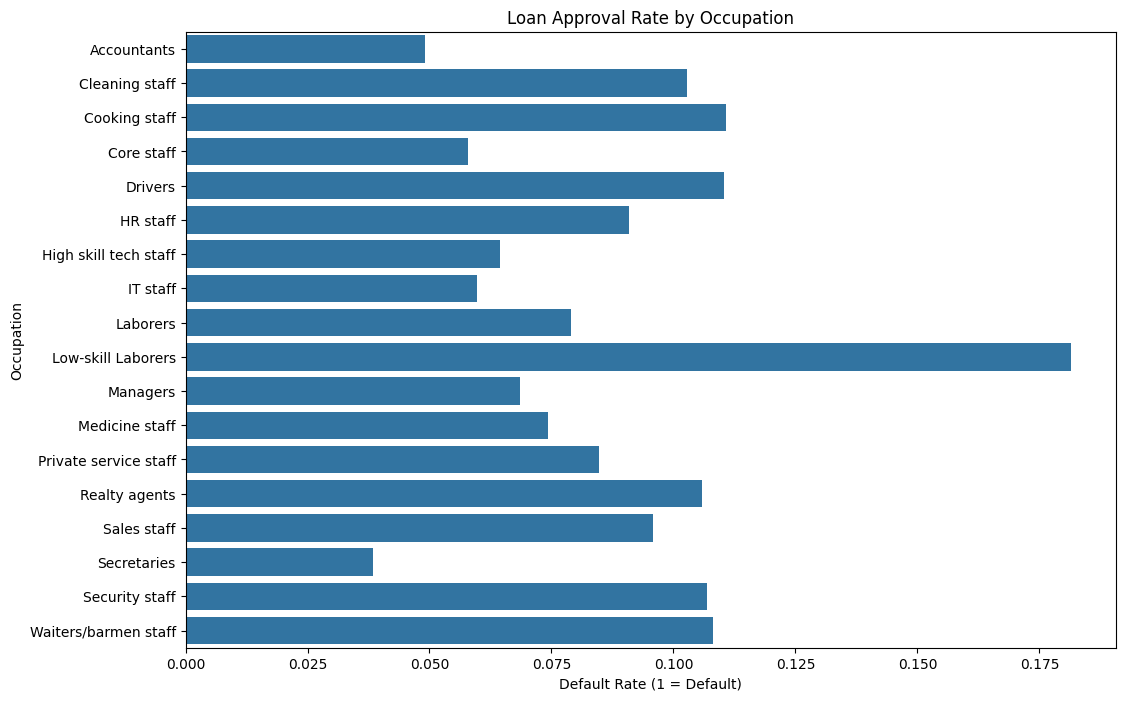

In [ ]:
plt.figure(figsize=(12, 8))
occupation_approval = app_df.groupby('OCCUPATION_TYPE')['TARGET'].mean().reset_index()
sns.barplot(x='TARGET', y='OCCUPATION_TYPE', data=occupation_approval)
plt.title('Loan Approval Rate by Occupation')
plt.xlabel('Default Rate (1 = Default)')
plt.ylabel('Occupation')
plt.show()

Observations:

1. **Low-Skill Laborers Have the Highest Default Rate**:  
   Among all occupations, low-skill laborers have the highest default rate, which is significantly higher than other occupations.

2. **Drivers and Realty Agents Also Show High Default Rates**:  
   Drivers and realty agents also have relatively high default rates, though still lower than low-skill laborers.

3. **Accountants and IT Staff Have Low Default Rates**:  
   Accountants and IT staff have some of the lowest default rates compared to other occupations, indicating they are more likely to repay loans successfully.

In summary, low-skill laborers have the highest default rate, while professions like accountants and IT staff have the lowest. Most other occupations fall somewhere in the middle.

Income bins and analyze approval rate per bin

<ipython-input-77-4a84bfdc7cf0>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-77-4a84bfdc7cf0>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



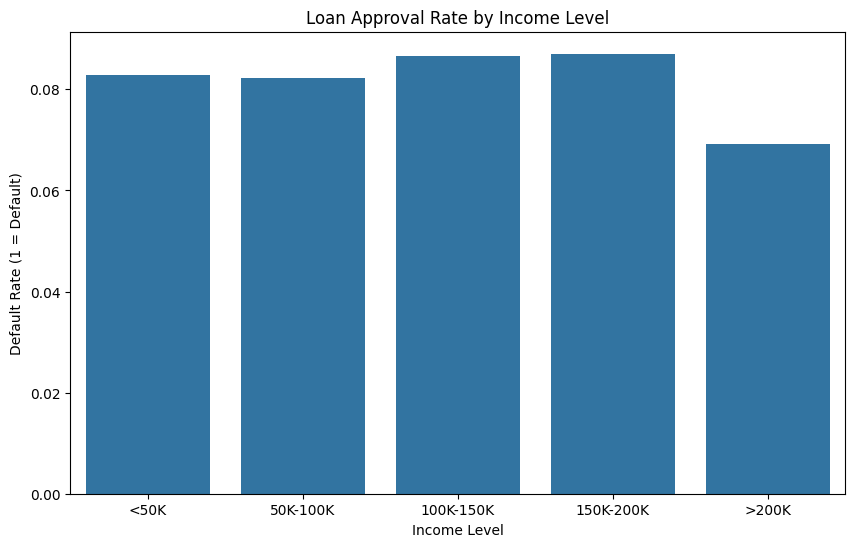

In [ ]:
app_df['Income_Bins'] = pd.cut(app_df['AMT_INCOME_TOTAL'], bins=[0, 50000, 100000, 150000, 200000, 1000000],
                           labels=['<50K', '50K-100K', '100K-150K', '150K-200K', '>200K'])

# Plot Income Level vs Loan Approval Rate
plt.figure(figsize=(10, 6))
income_approval =app_df.groupby('Income_Bins')['TARGET'].mean().reset_index()
sns.barplot(x='Income_Bins', y='TARGET', data=income_approval)
plt.title('Loan Approval Rate by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Default Rate (1 = Default)')
plt.show()

Observations:

1. **Higher Income Groups Have Lower Default Rates**:  
   People earning more than 200K have the lowest default rate compared to other income groups, indicating that higher income levels are linked to better loan repayment behavior.

2. **Moderate Default Rates Across Other Income Levels**:  
   Income groups between 50K and 200K show similar default rates, which are moderately high but not extreme, indicating that default risk is fairly steady in these income ranges.

3. **Slightly Higher Defaults for Lower Income Groups**:  
   People with an income below 50K have a higher default rate compared to those in the 200K+ group. This suggests that lower-income individuals may face more challenges in repaying loans.

In summary, higher income individuals have a lower risk of default, while lower and middle-income groups show moderate and similar default rates.

Gender vs Loan Approval Rate

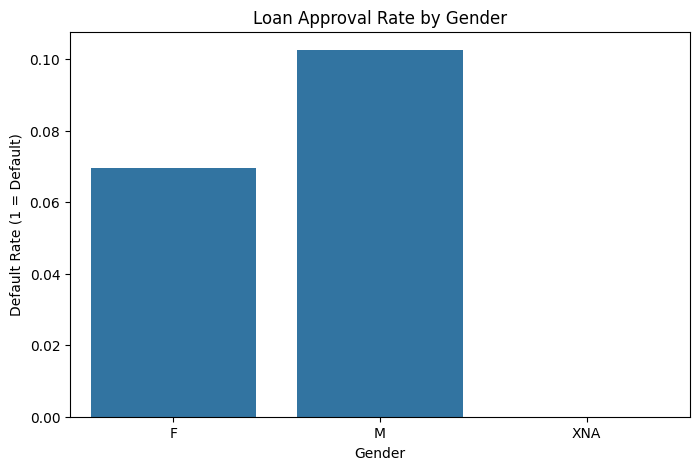

In [ ]:

plt.figure(figsize=(8, 5))
gender_approval = app_df.groupby('CODE_GENDER')['TARGET'].mean().reset_index()
sns.barplot(x='CODE_GENDER', y='TARGET', data=gender_approval)
plt.title('Loan Approval Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate (1 = Default)')
plt.show()

Observations:

1. **Males Have a Higher Default Rate**:  
   The default rate for males (M) is higher than for females, indicating that men are more likely to default on loans compared to women.

2. **Females Have a Lower Default Rate**:  
   Females (F) show a lower default rate compared to males, suggesting that women are generally more reliable in repaying loans.

3. **XNA Category Is Negligible**:  
   The XNA category has almost no representation in terms of loan defaults or approvals, making it an insignificant group in this analysis.

In summary, males have a higher default rate than females, and gender seems to play a role in loan repayment behavior.

Plot Loan Type vs Approval Rate


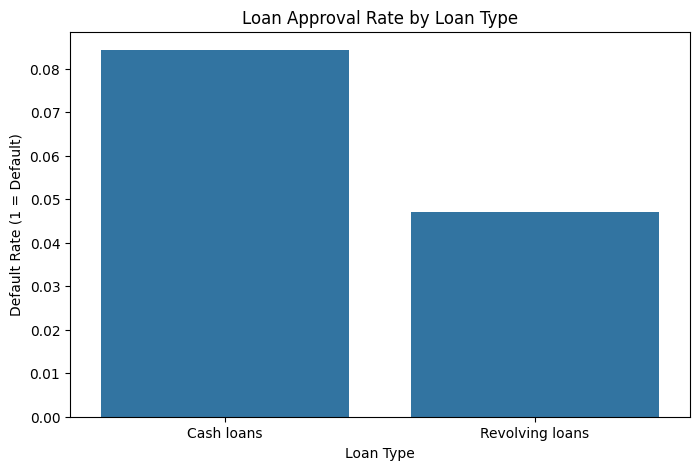

In [ ]:
plt.figure(figsize=(8, 5))
loan_type_approval = app_df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=loan_type_approval)
plt.title('Loan Approval Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Default Rate (1 = Default)')
plt.show()

Observations:

1. **Cash Loans Have a Higher Default Rate**:  
   People who take cash loans are more likely to default, as shown by the higher default rate compared to revolving loans.

2. **Revolving Loans Have a Lower Default Rate**:  
   Revolving loans show a lower default rate, indicating that these loans are less risky in terms of repayment.

3. **Cash Loans Are Riskier**:  
   The chart suggests that cash loans carry a higher risk of default, making them a riskier type of loan compared to revolving loans.

In summary, cash loans are more likely to default than revolving loans, making revolving loans a safer option.